# Sales Prediction using Advertisement Data

## Overview 
---
**Sales prediction means predicting how much of a product people will buy based on factors**
**such as the amount you spend to advertise your product, the segment of people you**
**advertise for, or the platform you are advertising on about your product.**


### Dataset
---

Shape: 200 rows × 5 columns

Columns:

- Unnamed: 0 → Index (can be dropped)
- TV → Advertising budget spent on TV (in thousands of dollars)
- Radio → Advertising budget spent on Radio
- Newspaper → Advertising budget spent on Newspaper
- Sales → Sales of the product (in thousands of units)


| Column        | Unit / Scale                                                        |
| ------------- | ------------------------------------------------------------------- |
| **TV**        | Advertising budget in **thousands of dollars** (so 195 → \$195,000) |
| **Radio**     | Advertising budget in **thousands of dollars** (so 38.2 → \$38,200) |
| **Newspaper** | Advertising budget in **thousands of dollars** (so 3.7 → \$3,700)   |
| **Sales**     | Product sales in **thousands of units** (so 7.6 → 7,600 units sold) |


In simple words: The dataset shows how much money was spent on TV, Radio, and Newspaper advertising, and how those factors influenced product sales.


## 1. Import Libraries 

In [212]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [213]:
# Models 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
 
# Utils 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics 

In [214]:
# saving file 
import pickle as pkl

## 2. Loading Dataset  

In [215]:
# Dataset 
df = pd.read_csv("Advertising.csv").drop("Unnamed: 0",axis = 1)

# preview 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [216]:
# preview 
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


## 3. Data Exploration 
---
- Data Info 
- Statistical Summary 
- Target Distribution
- Feature Distribution 
- Target vs Features Distribution 
- Correlation matrix

In [217]:
# Info
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [218]:
# Statistical Summary 
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


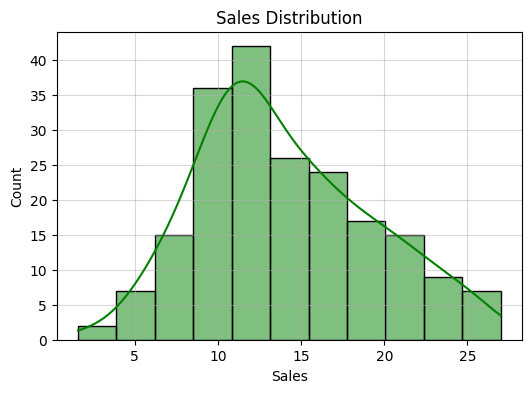

In [219]:
# Target : Sales Distribution Plot
plt.figure(figsize=(6 , 4))
sns.histplot(x = df["Sales"] , color ="green" , fill=True , kde=True)
plt.title("Sales Distribution")
plt.grid(True , alpha = 0.5)
plt.show()

**Findings : Peak value between 10-15k**

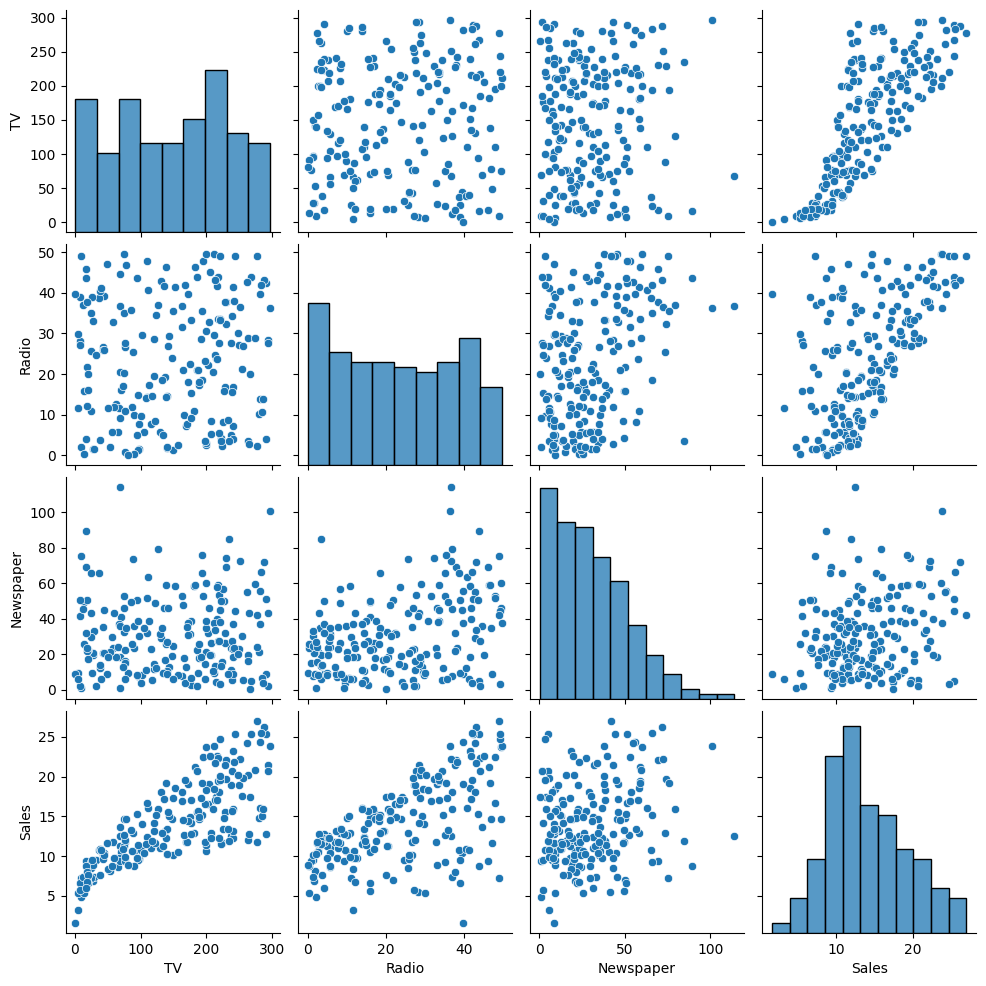

In [220]:
# Spread of data
sns.pairplot(df)
plt.show()

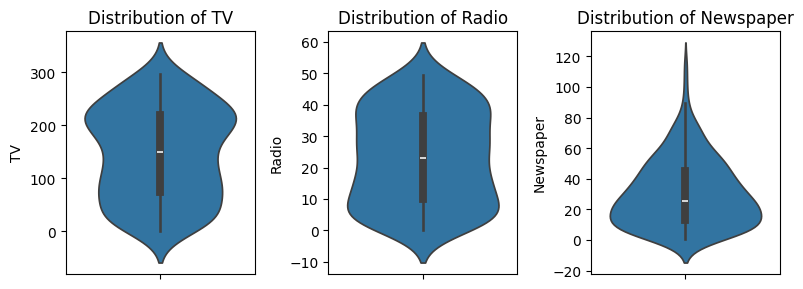

In [221]:
# Features Distribution
plt.figure(figsize=(8, 3)) 
for i , col in enumerate(df.columns[:-1] , 1):
    plt.subplot(1 , 3, i)
    sns.violinplot(df[col] )
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


### Findings: 
- Outliers(**Newspaper**) minimal
#### Distributions : 
- **TV**- Distribution Peak values around 200 & 250
- **Radio**- Distribution Peak values around 10 & 15
- **Newspaper**- Distribution Peak values around 15 & 25

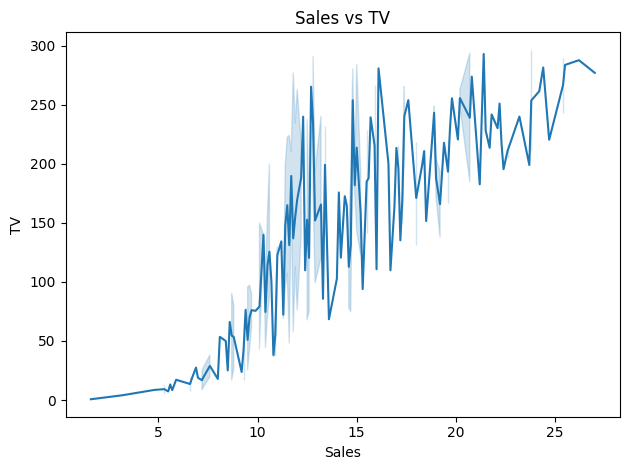

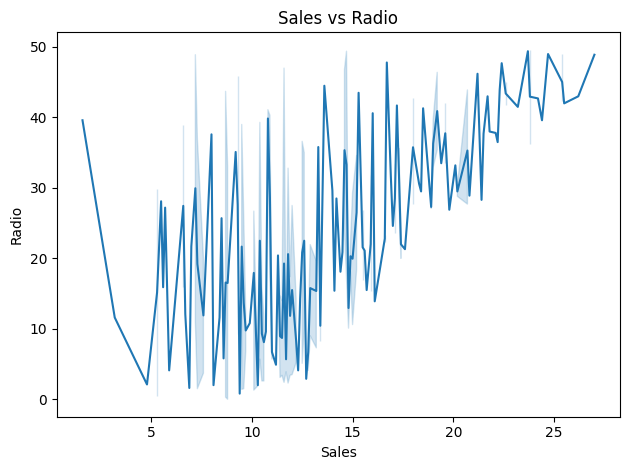

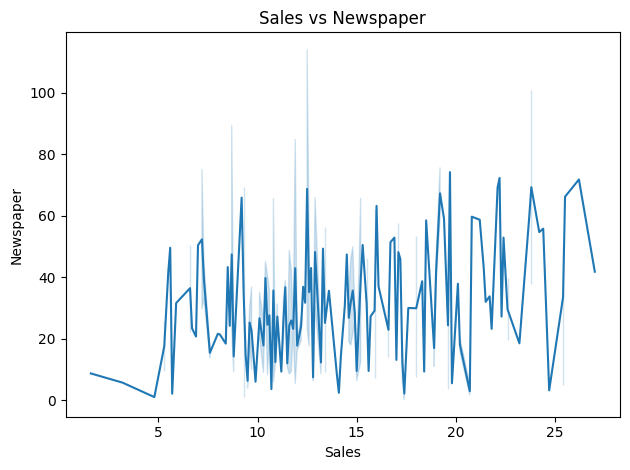

In [222]:
# Lineplot of Distribution of Feature vs Label 
for col in df.columns[:-1]:
    sns.lineplot(x="Sales" , y=col , data = df)
    plt.title(f"Sales vs {col}")
    plt.tight_layout()
    plt.show()


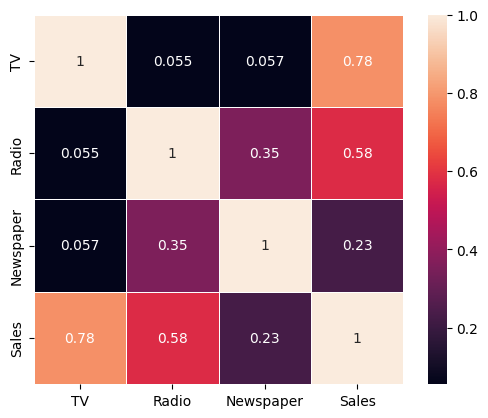

In [223]:
# Correlation matrix 
corr = df.corr()
sns.heatmap(corr , annot=True ,linewidths=0.5 , square=True)
plt.show()

**Findings : All features are mid to higly correlated to the target variable**

## 4. Model Building 
---
- 4.1 **Split**
- 4.2 **ML Pipeline**
- 4.3 **Report Encapsulator**
- 4.4 **Linear Regression**
- 4.5 **KNN Regressor**
- 4.6 **RandomForest Regressor**

### 4.1 Split :  Train , Test  & Scaling Data 

In [224]:
# X - Features , y - target
X = df.drop("Sales" , axis = 1) 
y = df["Sales"]

In [225]:
# Split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=666)

In [226]:
# Splitted Data
print("Train")
print(X_train.shape)
print(y_train.shape)

print("\nTest")
print(X_test.shape)
print(y_test.shape)

Train
(160, 3)
(160,)

Test
(40, 3)
(40,)


### 4.2 ML Pipeline

In [227]:
def ml_pipe(model):
    return Pipeline([
                ("Scaler" , StandardScaler()),
                ("Regression" , model)],
                verbose=True)


### 4.3 Report Encapsulator

In [228]:
def ReportEncapsulator(test , pred):
    # Test and Metrics 
    print("=============================")
    print("MAE : " , metrics.mean_absolute_error(test , pred))
    print("MSE : " , metrics.mean_squared_error(test, pred))
    print("RMSE : ",metrics.root_mean_squared_error(test , pred))
    print("R2 : ",metrics.r2_score(test , pred))
    print("=============================")

    # regression line
    plt.figure(figsize = (8 , 6))
    sns.scatterplot(x = test , y = pred ,alpha = 0.7)
    plt.plot([test.min(), test.max()], [test.min(), test.max()], color="red")  
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Predicted vs Actual Sales")
    plt.show()

    # residuals 
    residual = test - pred
    # plot
    plt.figure(figsize = (8 , 6))
    sns.scatterplot(x = pred , y = residual , color = 'blue')
    plt.axhline(y = 0 , color = "red" , linestyle = "--" )
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals Plot")
    plt.show()

### 4.4 Linear Regression 

#### 4.4.1 Linear Regression (Non Scaled Data)

In [229]:
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

MAE :  1.209234262232425
MSE :  2.4771459285288024
RMSE :  1.5738951453412653
R2 :  0.9064413947501474


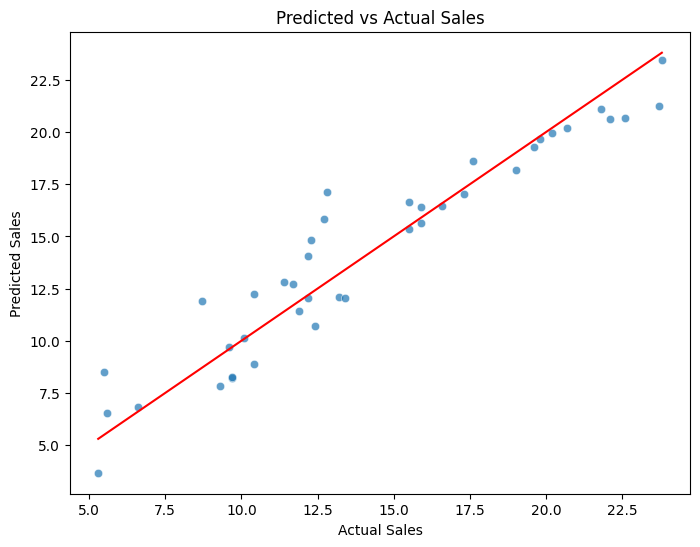

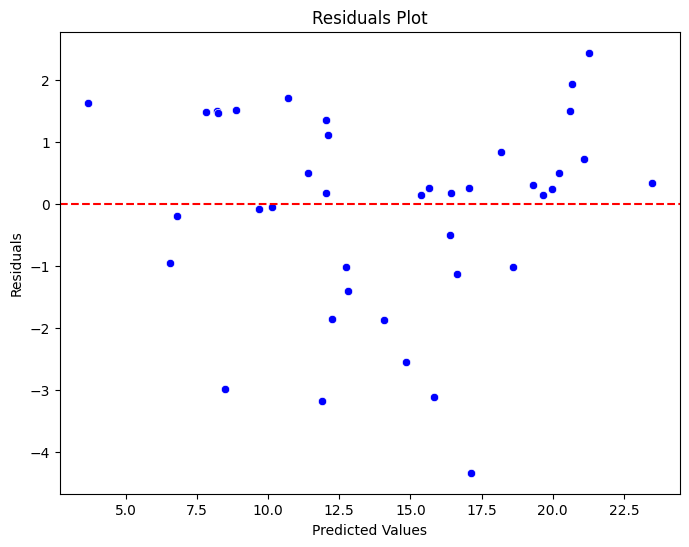

In [230]:
# prediction 
y_pred = lr_model.predict(X_test)

ReportEncapsulator(y_test , y_pred)

### 4.4.2 Linear Regression (scaled data)  

In [231]:
# Linear Reg Scaled
lr_model_scaled = ml_pipe(LinearRegression())

In [232]:
# Train model
lr_model_scaled.fit(X_train , y_train)

[Pipeline] ............ (step 1 of 2) Processing Scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing Regression, total=   0.0s


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())],
         verbose=True)

MAE :  1.209234262232426
MSE :  2.4771459285288033
RMSE :  1.5738951453412655
R2 :  0.9064413947501473


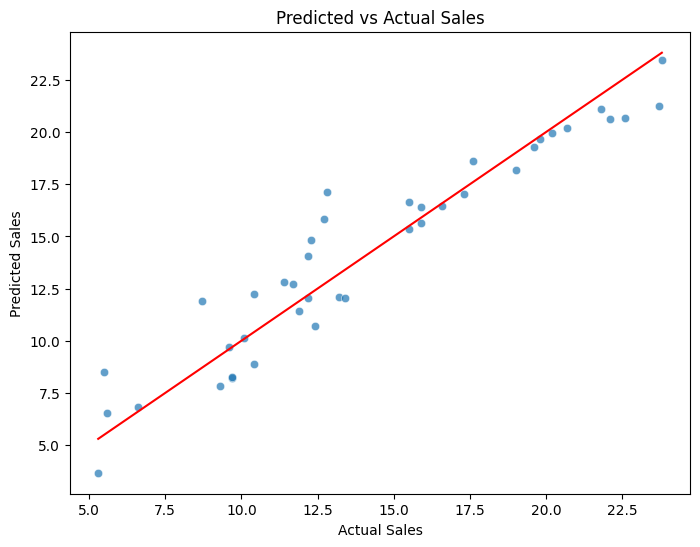

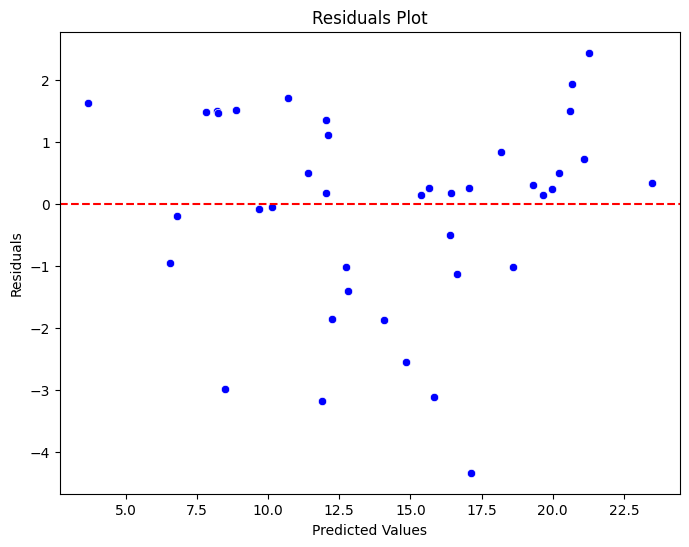

In [233]:
# predicting 
y_pred  = lr_model_scaled.predict(X_test)

# Report
ReportEncapsulator(y_test , y_pred)

### 4.4.3 Findings : 
**For Linear Regression, applying StandardScaler does not affect the model’s predictions or performance, only the scale of the coefficients. Hence, both scaled and unscaled models give the same results.**

### 4.5 KNN Regressor 

4.5.1 KNN Regressor (Non Scaled Data)

In [234]:
# KNN 
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train , y_train)

KNeighborsRegressor(n_neighbors=3)

MAE :  0.9700000000000003
MSE :  1.559055555555556
RMSE :  1.2486214620754987
R2 :  0.9411164834477712


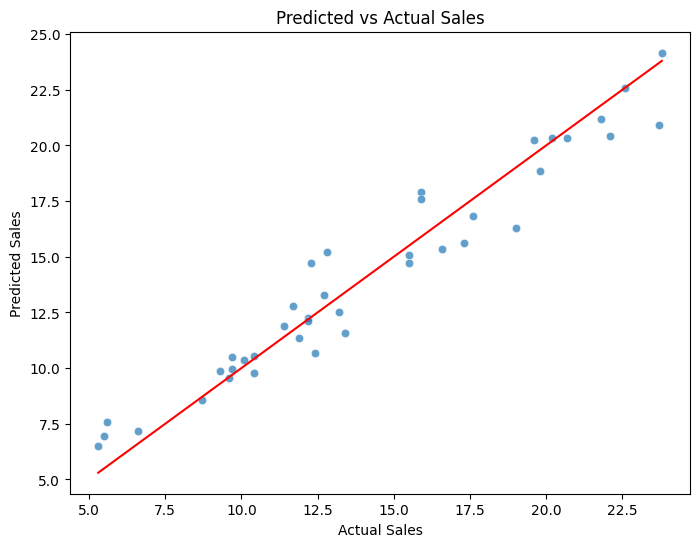

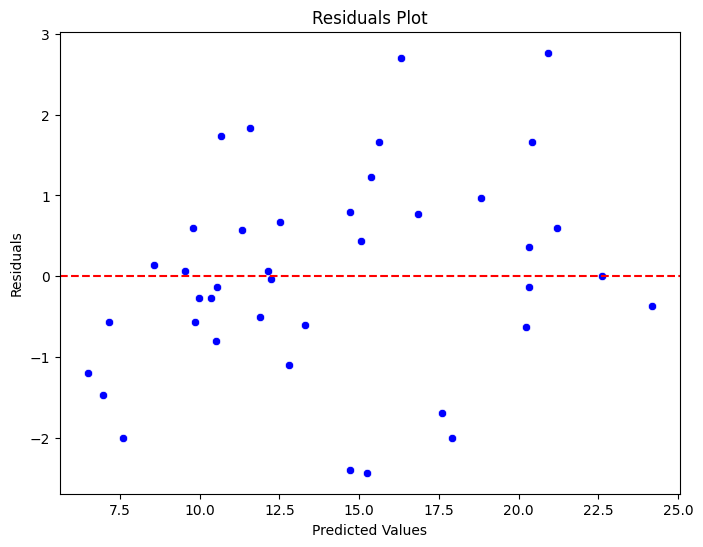

In [235]:
# prediction
y_pred = knn_model.predict(X_test)
# Report
ReportEncapsulator(y_test , y_pred)

#### 4.5.2 KNN Regressor (Scaled Data)

In [236]:
# ML pipeline 
knn_scaled_model = ml_pipe(KNeighborsRegressor(n_neighbors=3))
# Training 
knn_scaled_model.fit(X_train , y_train)

[Pipeline] ............ (step 1 of 2) Processing Scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing Regression, total=   0.0s


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', KNeighborsRegressor(n_neighbors=3))],
         verbose=True)

MAE :  0.8533333333333335
MSE :  1.3206666666666673
RMSE :  1.1492026221109433
R2 :  0.9501201241677802


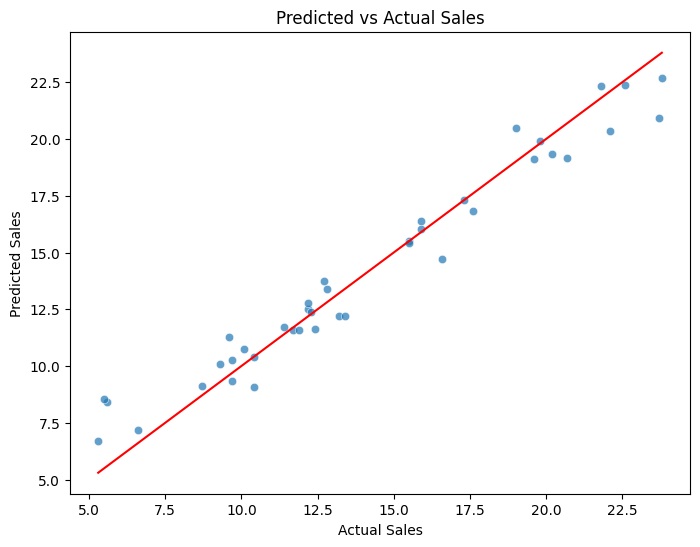

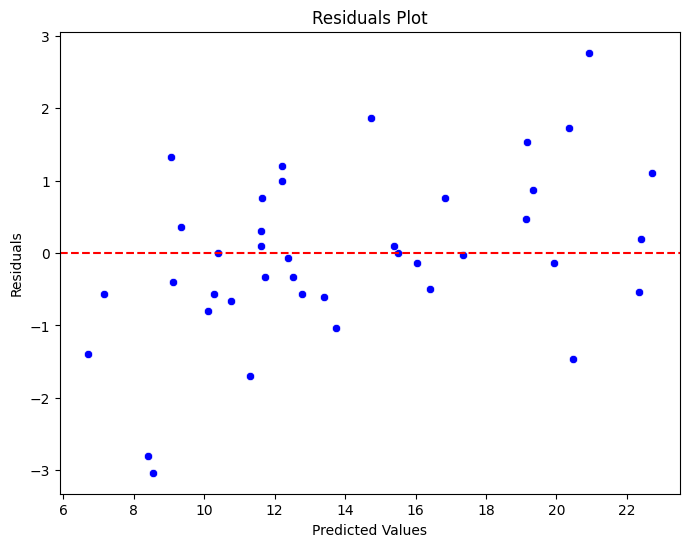

In [237]:
# prediction
y_pred = knn_scaled_model.predict(X_test)
# Report
ReportEncapsulator(y_test , y_pred)

### 4.5.3 Findings : 
**In this case, the scaled KNN model performed better than the unscaled version, showing that scaling is  always beneficial and its impact depends on the dataset.**

### 4.6 Random Forest Regressor 

#### 4.6.1 Random Forest Regressor (Non Scaled Data)

In [238]:
# RF - Non Scaled 
rf_model = RandomForestRegressor(random_state=101)

rf_model.fit(X_train , y_train)

RandomForestRegressor(random_state=101)

MAE :  0.5363499999999977
MSE :  0.4014180999999956
RMSE :  0.6335756466279269
R2 :  0.9848389563466895


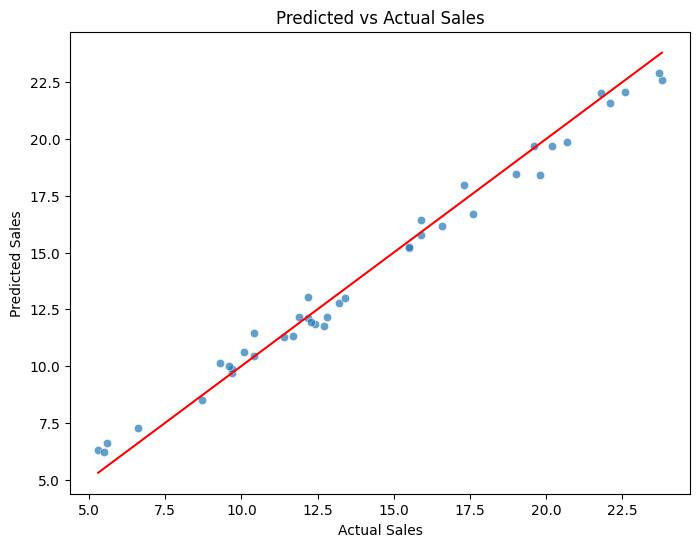

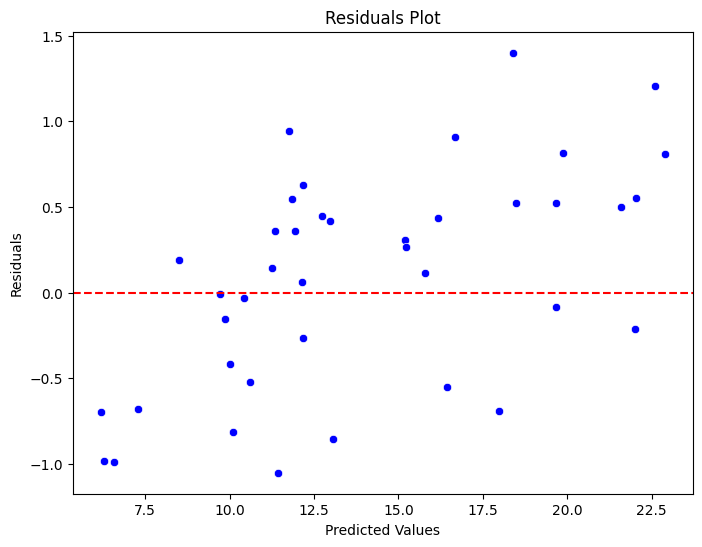

In [239]:
# Prediction 
y_pred = rf_model.predict(X_test)

# Report
ReportEncapsulator(y_test , y_pred)

#### 4.6.2 Random Forest Regressor (Scaled Data)

In [240]:
# RF Scaled
rf_model_scaled = ml_pipe(RandomForestRegressor())

# Training 
rf_model_scaled.fit(X_train , y_train)

[Pipeline] ............ (step 1 of 2) Processing Scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing Regression, total=   0.1s


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', RandomForestRegressor())],
         verbose=True)

MAE :  0.5279749999999972
MSE :  0.38256077499999497
RMSE :  0.6185149755664732
R2 :  0.9855511731787399


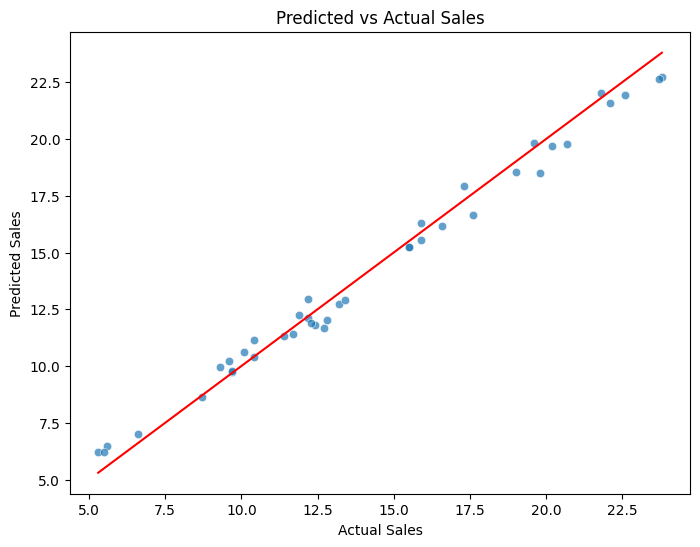

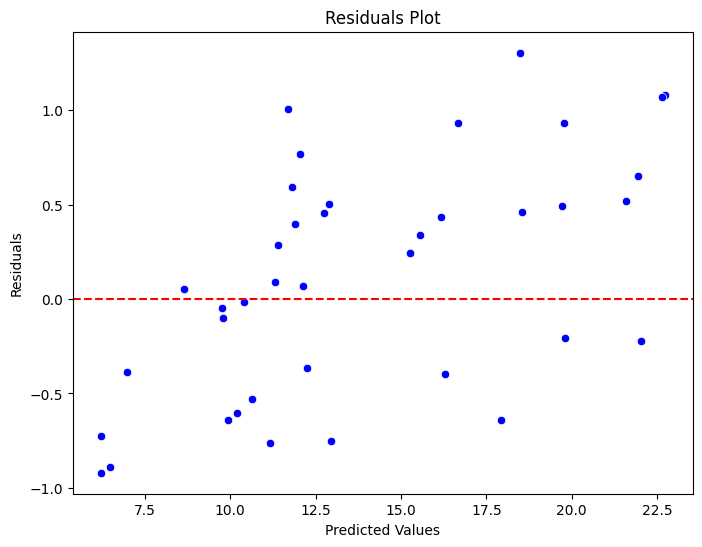

In [241]:
# Prediction
y_pred = rf_model_scaled.predict(X_test)

# Report
ReportEncapsulator(y_test , y_pred)

### 4.6.3 Findings: 
**"The Random Forest model shows a similar R² score for both scaled and unscaled data, indicating that scaling has little to no impact on tree-based models. Additionally, it achieves a higher R² score compared to Linear Regression and K-Nearest Neighbors (KNN), highlighting its superior performance on this dataset.**

In [243]:
# Saving the best model 
# Model choosen "rf_model_scaled"
with open("model.pkl" , "wb") as file:
    pkl.dump(rf_model_scaled , file)

### 5. Conclusion

After thoroughly evaluating the performance of all the models on our dataset, we found that **RandomForestScaled** consistently achieved the best results in terms of accuracy and generalization. Considering its robust performance, we have chosen it as our final model and saved it for future predictions and deployment.